Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

In [16]:
import math
def f(x):
    return  math.sin(x / 5.) * math.exp(x / 10.) + 5. * math.exp(-x / 2.)

In [17]:
x = range(1,16)

In [18]:
y = map(f, x)

In [19]:
from matplotlib import pylab as plt
%matplotlib inline

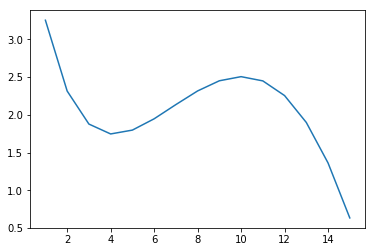

In [20]:
plt.plot(x,y)